# More visualizations!

In [1]:
# DS essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# python support
import re
import string
import datetime
import pickle 

# NLTK
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk import FreqDist

# emoji support!
import emoji

from preprocessing_funcs import clean_tweet, get_hashtags, get_emojis, emoji_as_words

In [2]:
with open('../data_files/tweets_with_feels.pickle', 'rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df.head()

month           handle    label  \
1   2016-10  detroitdailynew  clinton   
4   2017-08     mrclydepratt  clinton   
13  2016-08   pamela_moore13  clinton   
42  2017-03        paulinett  clinton   
43  2017-03          hyddrox  clinton   

                                                tweet  vader_score  
1   Clinton: Trump should’ve apologized more, atta...      -0.2484  
4   RT @Shareblue: Pence and his lawyers decided w...       0.0000  
13  Dave Chappelle: "Black Lives Matter" is the wo...      -0.6792  
42  RT @KStreetHipster: Hamner-Brown is already on...       0.0000  
43  RT @TrumpSuperPAC: Obama's a Muslim &amp; this...       0.4184

In [4]:
def sentiment_label(vader_score):
    if vader_score > 0.05:
        return 'positive'
    elif vader_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [5]:
df['sentiment'] = df['vader_score'].map(sentiment_label)

In [6]:
df['clean_tweets'] = df['tweet'].map(clean_tweet)

In [7]:
df['hashtags'] = df['tweet'].map(get_hashtags)

In [8]:
with open('../data_files/twitter_stopwords.txt') as f:
    words = f.read().split(',')
    twitter_stopwords = list(words)
    twitter_stopwords = [word.lower() for word in twitter_stopwords]

len(twitter_stopwords)

624

In [9]:
with open('../data_files/stopwords_eng_germ.txt') as f:
    words = f.read().split(',')
    other_stopwords = list(words)
    other_stopwords = [word.lower() for word in other_stopwords]

len(other_stopwords)

841

In [10]:
stopwords = set(twitter_stopwords + other_stopwords)
len(stopwords)

841

In [11]:
df['clean_no_stops'] = df['clean_tweets'].apply(lambda x: " ".join(w for w in nltk.word_tokenize(x) if w not in stopwords))

In [12]:
df.head()

month           handle    label  \
1   2016-10  detroitdailynew  clinton   
4   2017-08     mrclydepratt  clinton   
13  2016-08   pamela_moore13  clinton   
42  2017-03        paulinett  clinton   
43  2017-03          hyddrox  clinton   

                                                tweet  vader_score sentiment  \
1   Clinton: Trump should’ve apologized more, atta...      -0.2484  negative   
4   RT @Shareblue: Pence and his lawyers decided w...       0.0000   neutral   
13  Dave Chappelle: "Black Lives Matter" is the wo...      -0.6792  negative   
42  RT @KStreetHipster: Hamner-Brown is already on...       0.0000   neutral   
43  RT @TrumpSuperPAC: Obama's a Muslim &amp; this...       0.4184  positive   

                                         clean_tweets hashtags  \
1   clinton trump should ve apologized more attack...       []   
4   pence and his lawyers decided which of his off...       []   
13  dave chappelle black lives matter is the worst...       []   
42  hamner brown is already on its way here it s b...  [KSHBC]   
43  obama s a muslim amp this video from foxnews p...   [MAGA]   

                                       clean_no_stops  
1              clinton trump apologized attacked less  
4   pence lawyers decided official emails public c...  
13  dave chappelle black lives matter worst slogan...  
42        hamner brown already way way billions kshbc  
43  obama muslim video foxnews proves even cnn adm...

In [13]:
df.label.unique()

array(['clinton', 'trump', 'general', 'middle_east', 'conservative',
       'violence', 'right_wing_news'], dtype=object)

## Topics & Sentiments Time Series

Plotting again for better quality visuals to use in the presentation.

### Topics Time Series

In [14]:
date_freq = df.groupby(['month', 'label']).size().unstack().reset_index()

In [15]:
date_freq.fillna(0, inplace=True)
date_freq['total'] = date_freq.sum(axis=1)

In [16]:
date_freq

label    month  clinton  conservative  general  middle_east  right_wing_news  \
0      2014-07      0.0           9.0      2.0          0.0              0.0   
1      2014-08      0.0           0.0      0.0          0.0              0.0   
2      2014-09      0.0           1.0      0.0          0.0              0.0   
3      2014-11      5.0         158.0    117.0         14.0             23.0   
4      2014-12      6.0         217.0     90.0         11.0             26.0   
5      2015-01     27.0         963.0    568.0         58.0            125.0   
6      2015-02     48.0         901.0    444.0         96.0            128.0   
7      2015-03    102.0         860.0    487.0        114.0            103.0   
8      2015-04     86.0         637.0    494.0        103.0            106.0   
9      2015-05    110.0         378.0    373.0         97.0            189.0   
10     2015-06    226.0         596.0    535.0        281.0            203.0   
11     2015-07     67.0         209.0    326.0        139.0             68.0   
12     2015-08     40.0         175.0    121.0         35.0             21.0   
13     2015-09     20.0          96.0     42.0         31.0             10.0   
14     2015-10     74.0         221.0    156.0         94.0             60.0   
15     2015-11     32.0         238.0     97.0        133.0             54.0   
16     2015-12    174.0         855.0    476.0        429.0            285.0   
17     2016-01    110.0         373.0    226.0        194.0            124.0   
18     2016-02    218.0         790.0    531.0        685.0            929.0   
19     2016-03    110.0         563.0    261.0       1092.0            336.0   
20     2016-04     18.0         125.0     85.0         21.0             14.0   
21     2016-05     71.0         390.0    182.0        127.0            276.0   
22     2016-06     70.0         234.0    110.0        153.0             69.0   
23     2016-07    859.0         912.0    406.0        490.0            142.0   
24     2016-08   1155.0        2039.0   1343.0        707.0            496.0   
25     2016-09   4430.0        3809.0   2725.0       1867.0            770.0   
26     2016-10   4319.0        4107.0   4291.0       1285.0            680.0   
27     2016-11   1882.0        4124.0   3926.0       1007.0            833.0   
28     2016-12   1093.0        4724.0   4548.0       1304.0           1200.0   
29     2017-01   1246.0        4736.0   3614.0       1609.0           1416.0   
30     2017-02    575.0        2125.0   1935.0        727.0            646.0   
31     2017-03    590.0        1562.0   1419.0        545.0            726.0   
32     2017-04    178.0         854.0   1404.0        184.0            489.0   
33     2017-05     11.0         139.0    192.0         17.0             31.0   
34     2017-06     13.0          49.0     66.0         29.0            147.0   
35     2017-07    134.0         688.0    917.0        154.0            297.0   
36     2017-08     38.0         279.0    296.0         64.0            223.0   
37     2017-09      1.0           4.0      3.0          1.0              1.0   

label    trump  violence    total  
0          1.0       0.0     12.0  
1          1.0       0.0      1.0  
2          0.0       0.0      1.0  
3         55.0      10.0    382.0  
4         74.0      15.0    439.0  
5        309.0     107.0   2157.0  
6        321.0     111.0   2049.0  
7        449.0     167.0   2282.0  
8        403.0     372.0   2201.0  
9        356.0     353.0   1856.0  
10       811.0     817.0   3469.0  
11       458.0     372.0   1639.0  
12       440.0     134.0    966.0  
13        61.0      57.0    317.0  
14       294.0     143.0   1042.0  
15       243.0     107.0    904.0  
16      1063.0     556.0   3838.0  
17       505.0     170.0   1702.0  
18      1572.0     370.0   5095.0  
19      1067.0     293.0   3722.0  
20       122.0      54.0    439.0  
21       662.0     209.0   1917.0  
22       235.0     161.0   1032.0  
23      2629.0 

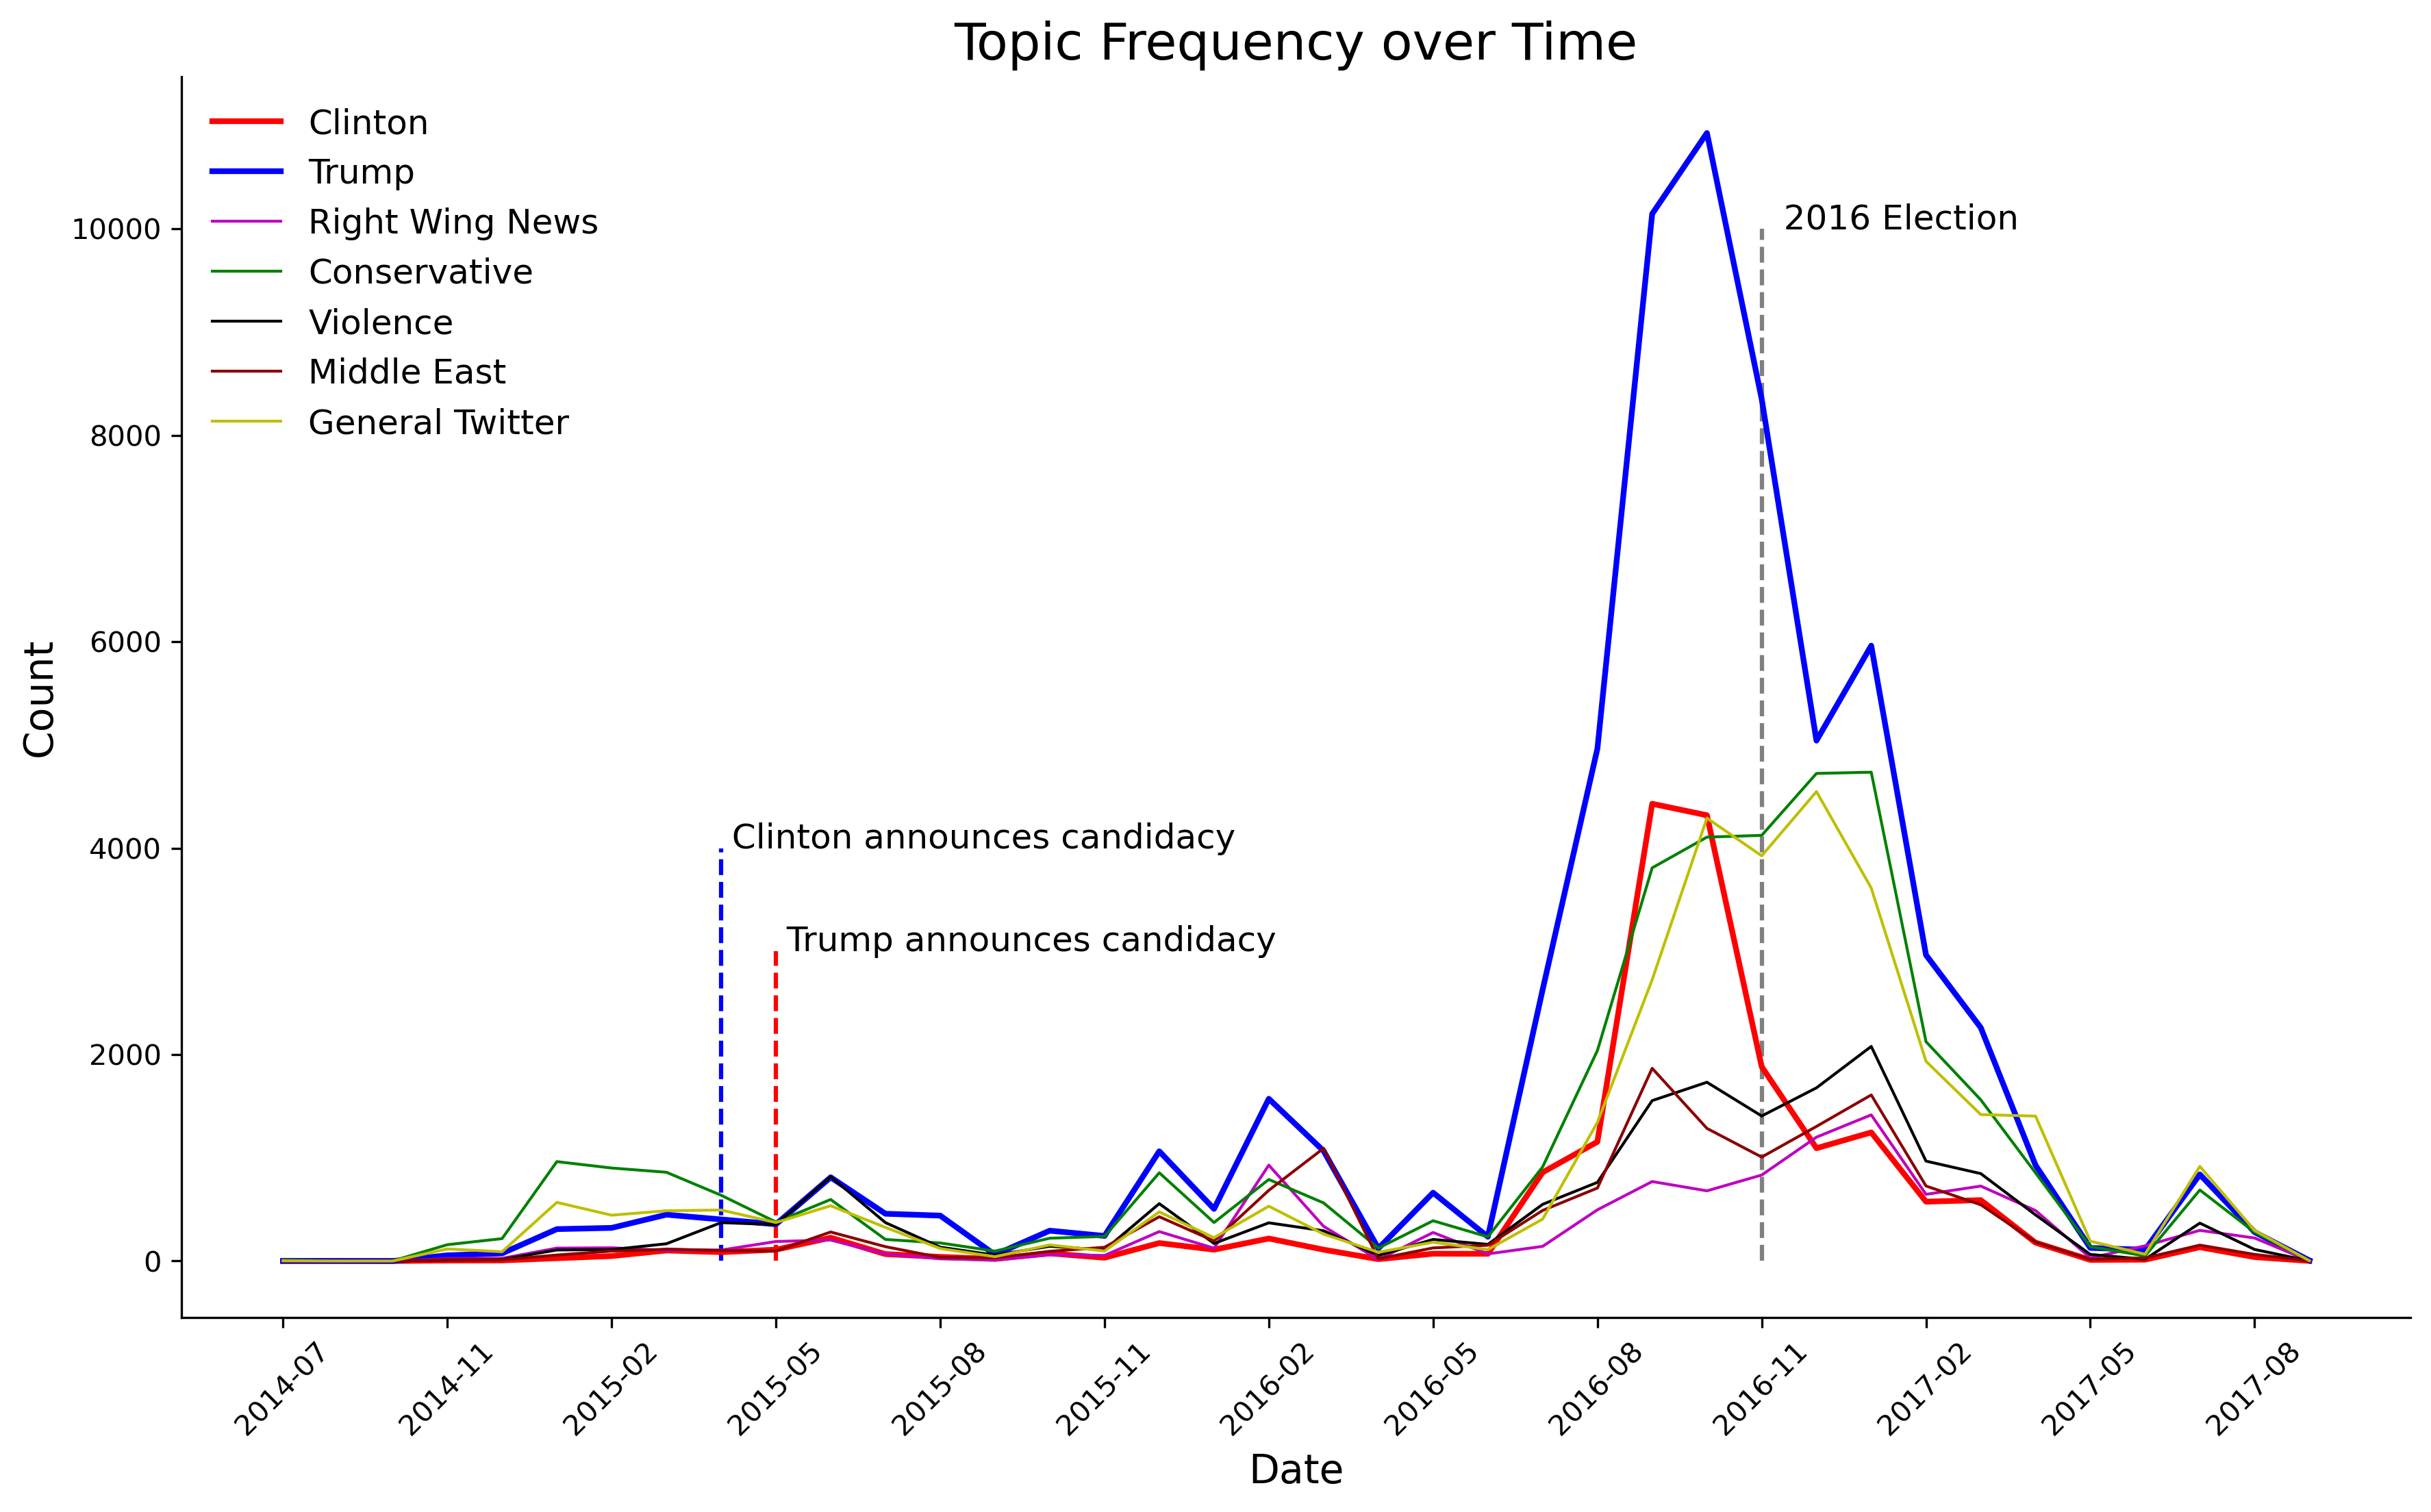

In [17]:
dates = date_freq.month
x_ticks = list(date_freq.month.unique()[::3])

clinton = date_freq.clinton
trump = date_freq.trump
conservative = date_freq.conservative
gen_twitter = date_freq.general
middle_east = date_freq.middle_east
violence = date_freq.violence
right_wing_news = date_freq.right_wing_news


plt.figure(figsize=(14, 8), dpi=300)
plt.plot(dates, clinton, color='r', linewidth=2, label='Clinton')
plt.plot(dates, trump, color='b', linewidth=2, label='Trump')

plt.plot(dates, right_wing_news, color='m', linewidth=1, label='Right Wing News')
plt.plot(dates, conservative, color='g', linewidth=1, label='Conservative')
plt.plot(dates, violence, color='0', linewidth=1, label='Violence')
plt.plot(dates, middle_east, color='darkred', linewidth=1, label='Middle East')
plt.plot(dates, gen_twitter, color='y', linewidth=1, label='General Twitter')

plt.vlines('2015-04', ymin=0, ymax=4000, linestyle='--', color='b')
plt.text('2015-04', 4000, ' Clinton announces candidacy', rotation=0, fontsize=12)

plt.vlines('2015-05', ymin=0, ymax=3000, linestyle='--', color='r')
plt.text('2015-05', 3000, ' Trump announces candidacy', rotation=0, fontsize=12)

plt.vlines('2016-11', ymin=0, ymax=10000, linestyle='--', color='grey')
plt.text('2016-11', 10000, '  2016 Election', rotation=0, fontsize=12)


plt.title('Topic Frequency over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(x_ticks, rotation=45)
plt.legend(loc='upper left', frameon=False, fontsize=12)
sns.despine()
#plt.savefig('../img/top_freq_timeseries.png');

In [18]:
clinton_feels = df[(df['label'] == 'clinton') & 
                   (df['month'] >= '2014-11') & 
                   (df['month'] <= '2017-07')].groupby('month').agg({'vader_score': 'mean'}).reset_index()

trump_feels = df[(df['label'] == 'trump') & 
                 (df['month'] >= '2014-11') & 
                 (df['month'] <= '2017-07')].groupby('month').agg({'vader_score': 'mean'}).reset_index()

general_feels = df[(df['label'] == 'general') & 
                   (df['month'] >= '2014-11') & 
                   (df['month'] <= '2017-07')].groupby('month').agg({'vader_score': 'mean'}).reset_index()

### Sentiment Time Series

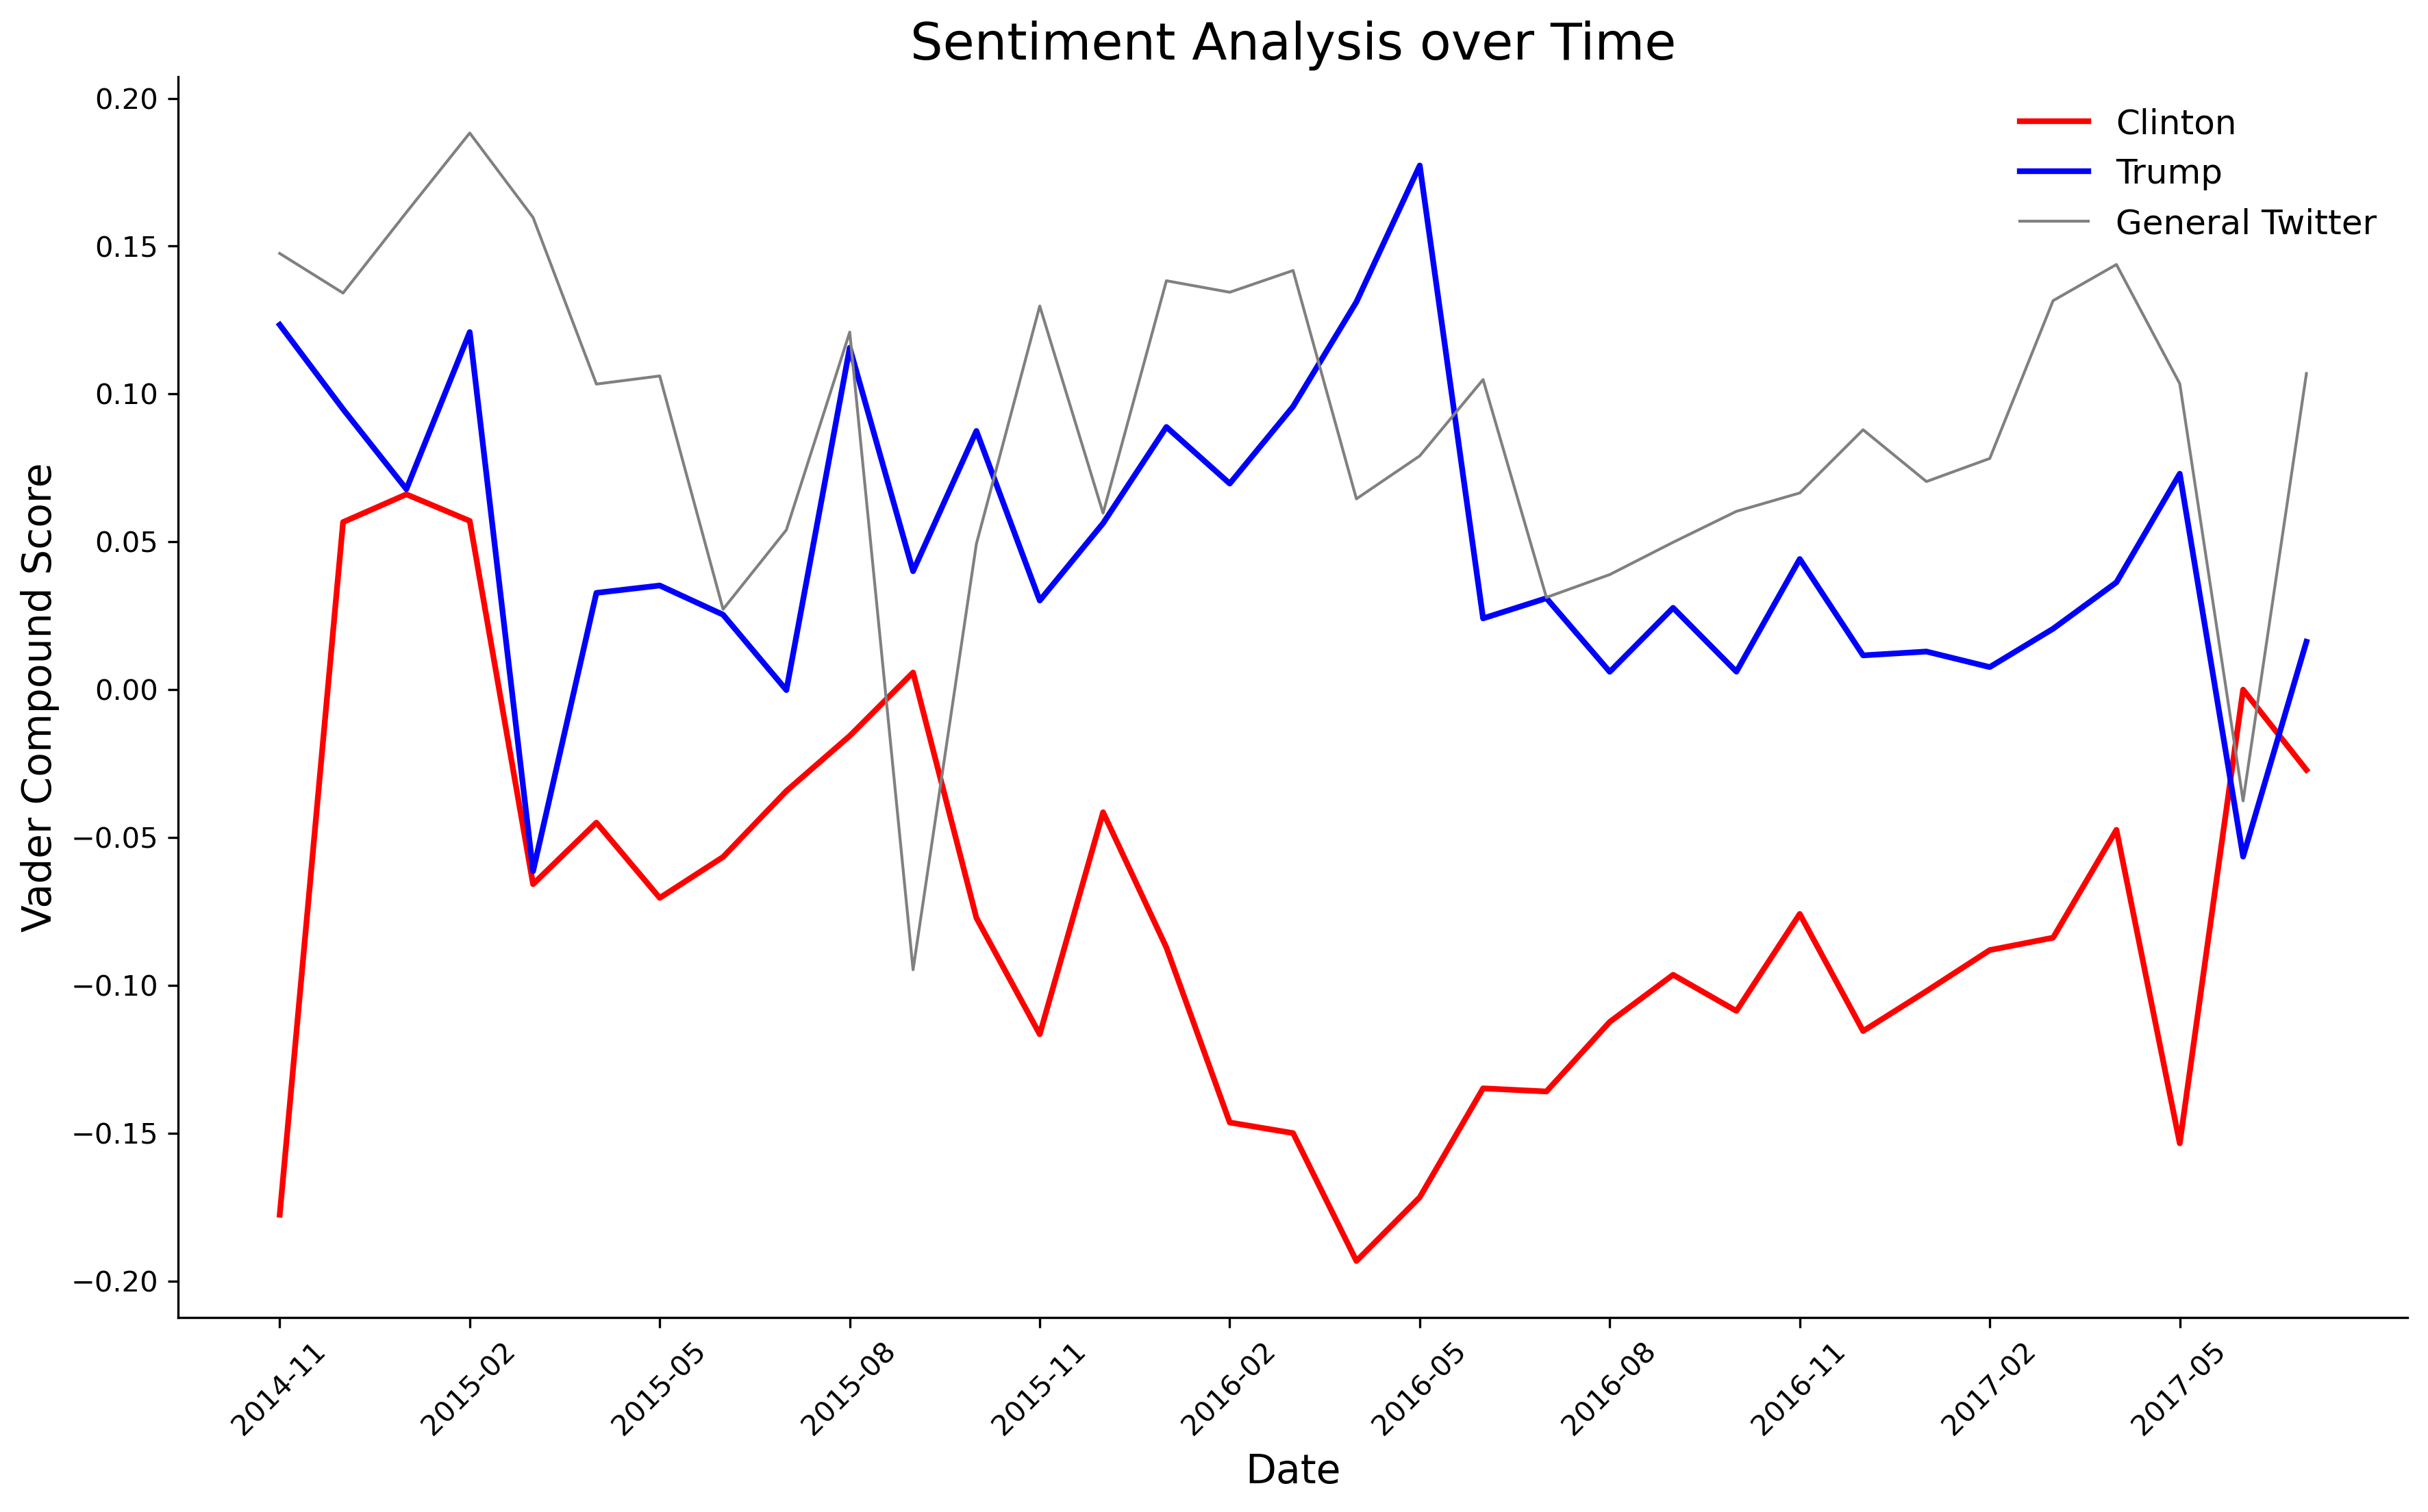

In [19]:
clinton = clinton_feels.vader_score
trump = trump_feels.vader_score
general = general_feels.vader_score

month = general_feels.month

x_ticks = list(general_feels.month.unique()[::3])

plt.figure(figsize=(14, 8), dpi=300)
plt.plot(month, clinton, color='r', linewidth=2, label='Clinton')
plt.plot(month, trump, color='b', linewidth=2, label='Trump')
plt.plot(month, general, color='grey', linewidth=1, label='General Twitter')


plt.title('Sentiment Analysis over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Vader Compound Score', fontsize=14)
plt.xticks(x_ticks, rotation=45)
plt.legend(loc='best', frameon=False, fontsize=12)
sns.despine()
#plt.savefig('../img/sentiment_timeseries.png');

## Word Clouds

In [20]:
def make_wordcloud(word_string, max_words=50):
    fdist = FreqDist(word_string)

    wc = WordCloud(background_color='white', width=600, height=400, max_words=max_words)
    wc.generate_from_frequencies(fdist)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    

### All Tweets

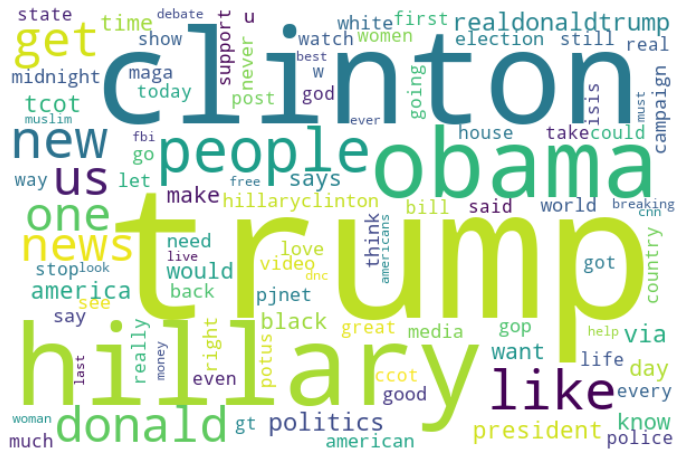

In [21]:
# all tweets
tweets = " ".join(df.clean_no_stops.values).split()

make_wordcloud(tweets, 100)

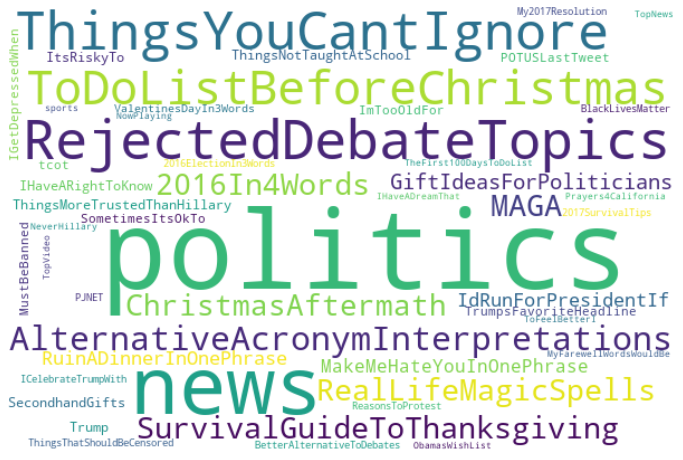

In [22]:
# All Hashtags
hashtags = df['hashtags'].apply(lambda x: " ".join(x))
make_wordcloud(hashtags, 50)

### Clinton

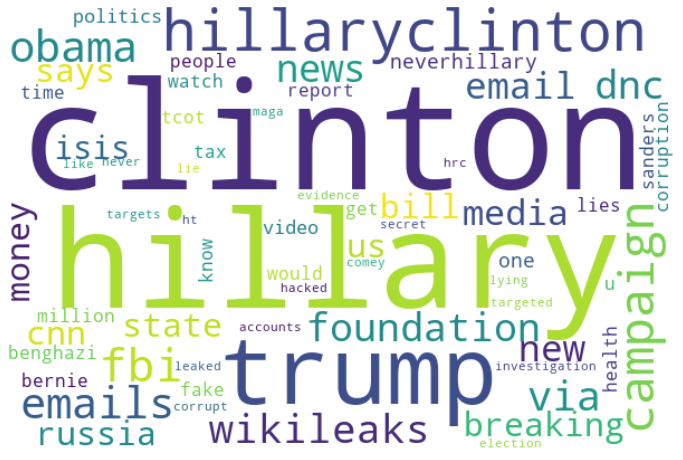

In [23]:
# Clinton Tweets
tweets = " ".join(df[df['label'] == 'clinton'].clean_no_stops.values).split()

make_wordcloud(tweets, 65)

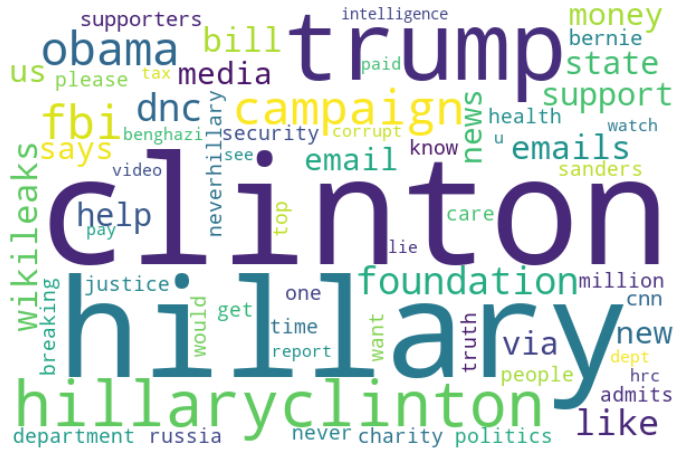

In [24]:
# Clinton -- POSITIVE
tweets = " ".join(df[(df['label'] == 'clinton') & 
                     (df['sentiment'] == 'positive')]
                  .clean_no_stops.values).split()

make_wordcloud(tweets, 65)

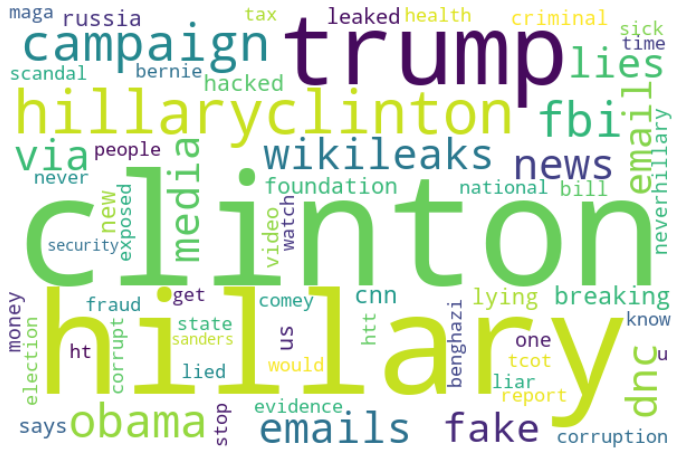

In [25]:
# Clinton -- NEGATIVE
tweets = " ".join(df[(df['label'] == 'clinton') & 
                     (df['sentiment'] == 'negative')]
                  .clean_no_stops.values).split()

make_wordcloud(tweets, 65)

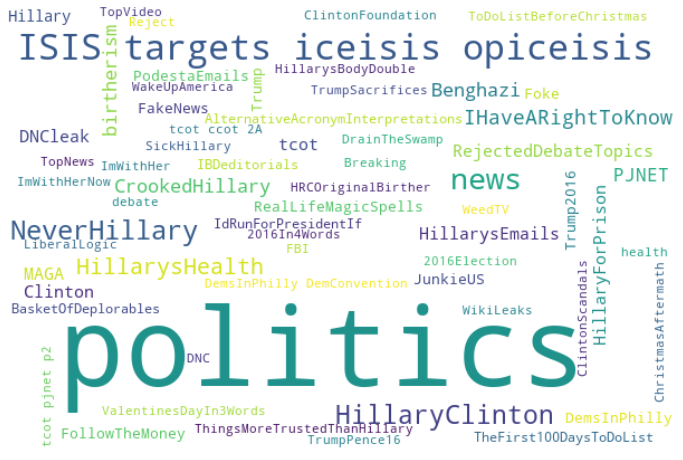

In [26]:
# Hashtags
clinton = df[df['label'] == 'clinton']
hashtags = clinton['hashtags'].apply(lambda x: " ".join(x))
make_wordcloud(hashtags, 65)

### Trump

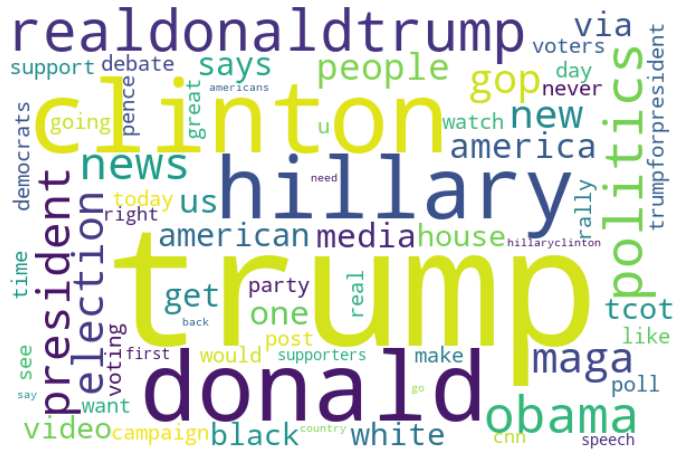

In [27]:
# trump tweets

tweets = " ".join(df[df['label'] == 'trump'].clean_no_stops.values).split()

make_wordcloud(tweets, 65)

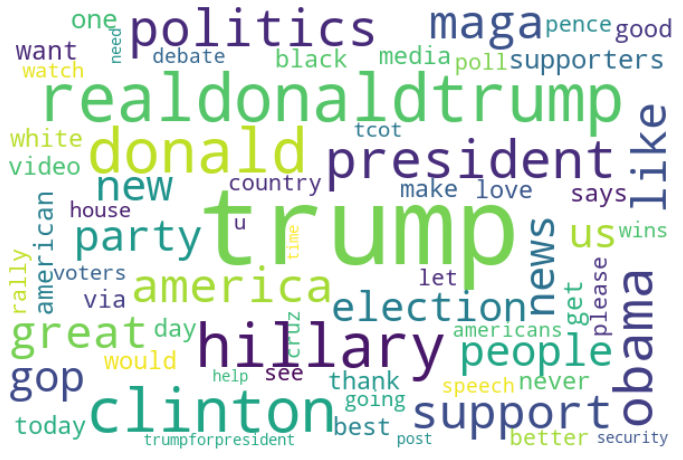

In [28]:
# trump -- NEGATIVE
tweets = " ".join(df[(df['label'] == 'trump') & 
                     (df['sentiment'] == 'positive')]
                  .clean_no_stops.values).split()

make_wordcloud(tweets, 65)

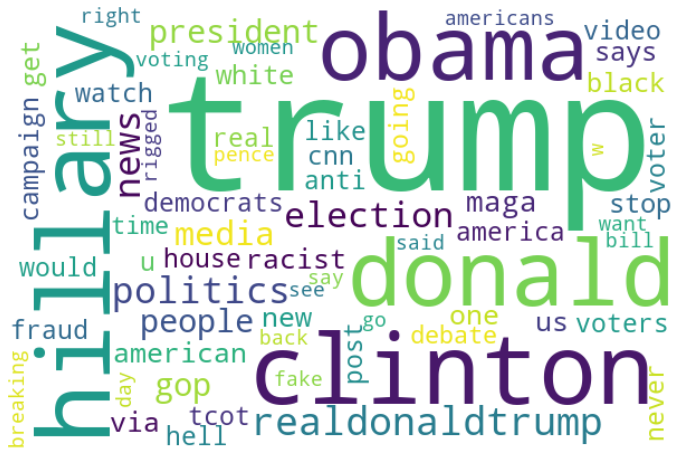

In [29]:
# trump -- NEGATIVE
tweets = " ".join(df[(df['label'] == 'trump') & 
                     (df['sentiment'] == 'negative')]
                  .clean_no_stops.values).split()

make_wordcloud(tweets, 65)

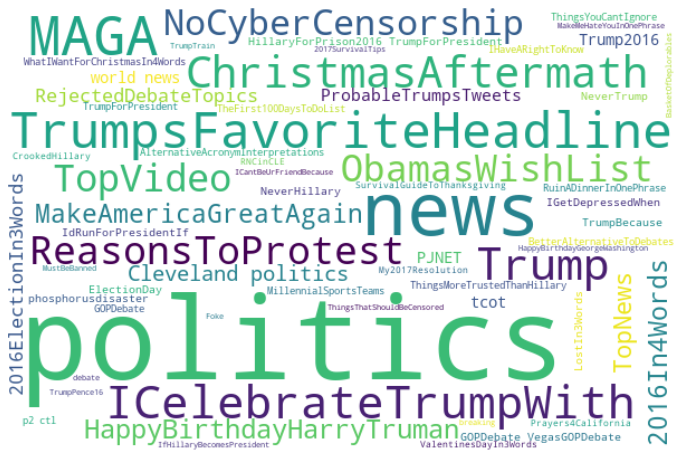

In [30]:
# Hashtags
trump = df[df['label'] == 'trump']
hashtags = trump['hashtags'].apply(lambda x: " ".join(x))
make_wordcloud(hashtags, 65)

### Other labels

#### Right Wing News

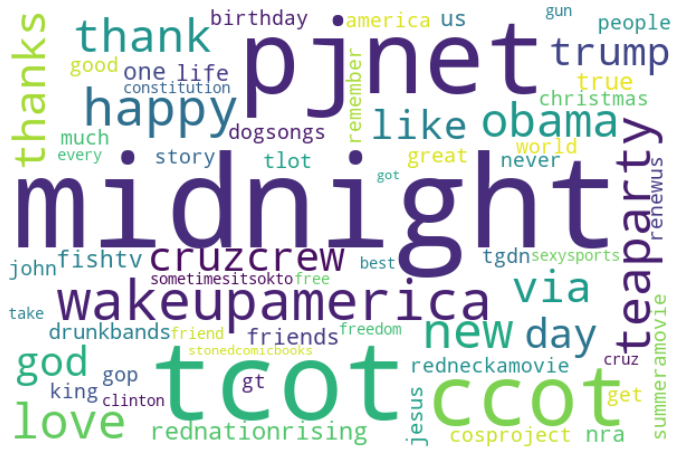

In [31]:
# Right wing news tweets
tweets = " ".join(df[df['label'] == 'right_wing_news'].clean_no_stops.values).split()
make_wordcloud(tweets, 65)
#plt.savefig('../img/wc_rw.png')

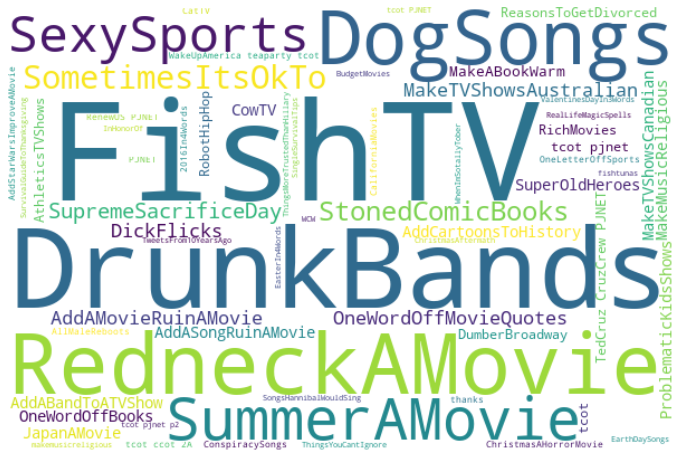

In [32]:
# Hashtags
rw = df[df['label'] == 'right_wing_news']
hashtags = rw['hashtags'].apply(lambda x: " ".join(x))
make_wordcloud(hashtags, 65)

#### Conservative

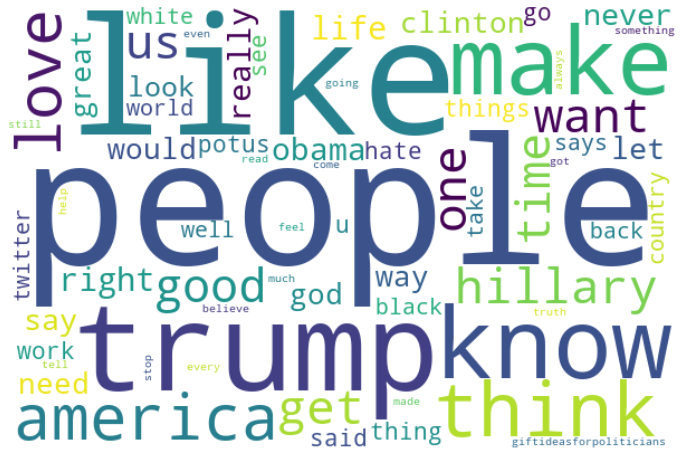

In [33]:
# Conservative tweets
tweets = " ".join(df[df['label'] == 'conservative'].clean_no_stops.values).split()

make_wordcloud(tweets, 65)
#plt.savefig('../img/wc_conservative.png')

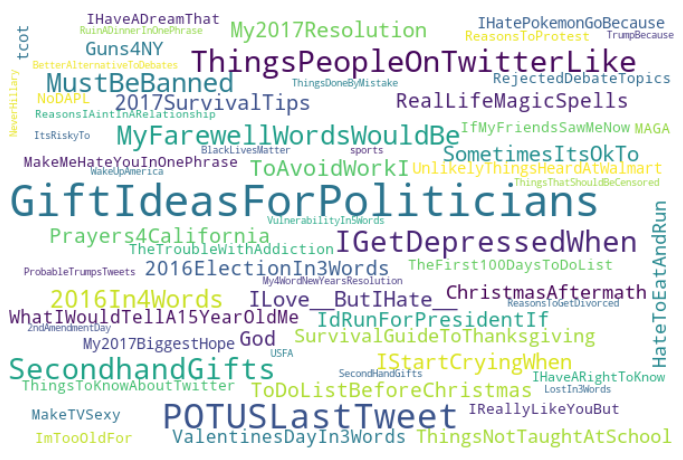

In [34]:
# Hashtags
cons = df[df['label'] == 'conservative']
hashtags = cons['hashtags'].apply(lambda x: " ".join(x))
make_wordcloud(hashtags, 65)

#### Middle East

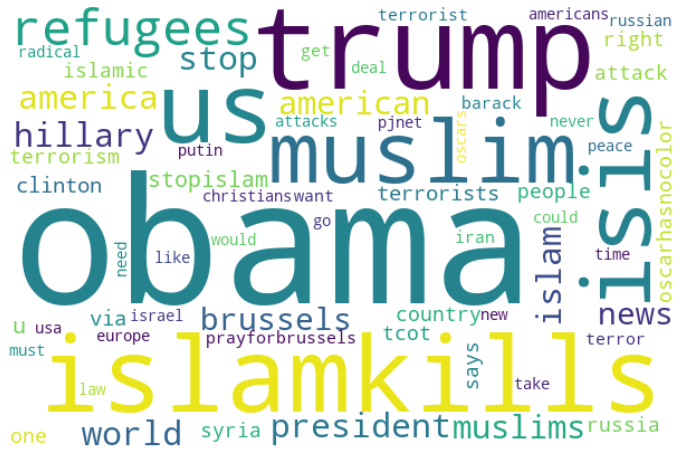

In [35]:
# Middle east tweets
tweets = " ".join(df[df['label'] == 'middle_east'].clean_no_stops.values).split()

make_wordcloud(tweets, 65)
#plt.savefig('../img/wc_middleast.png')

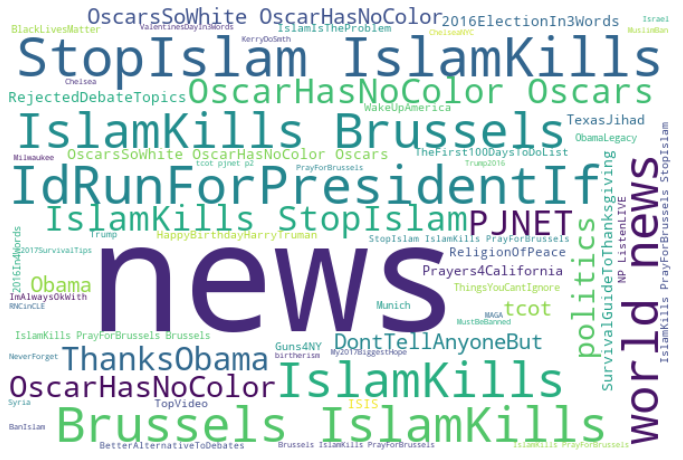

In [36]:
# Hashtags
me = df[df['label'] == 'middle_east']
hashtags = me['hashtags'].apply(lambda x: " ".join(x))
make_wordcloud(hashtags, 65)

#### Violence

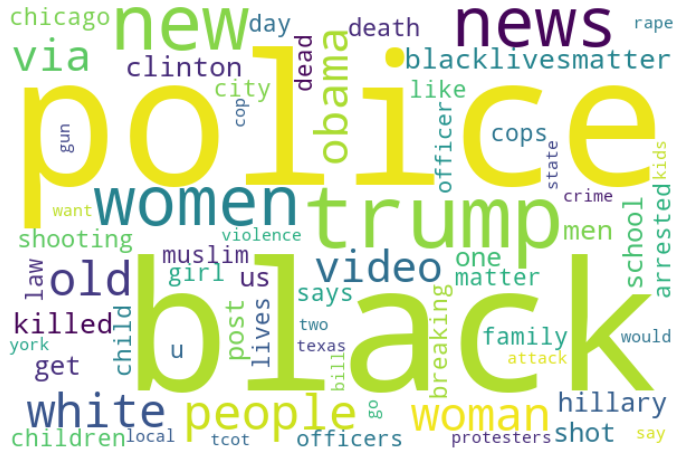

In [37]:
# Violence Tweets
tweets = " ".join(df[df['label'] == 'violence'].clean_no_stops.values).split()

make_wordcloud(tweets, 65)
#plt.savefig('../img/wc_violence.png')

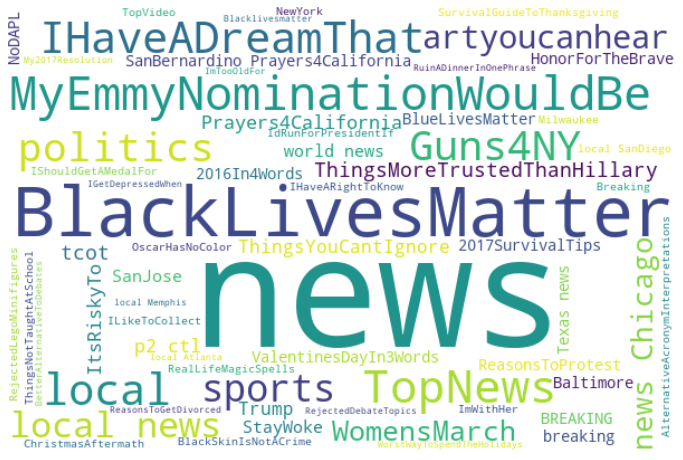

In [38]:
# Hashtags
vio = df[df['label'] == 'violence']
hashtags = vio['hashtags'].apply(lambda x: " ".join(x))
make_wordcloud(hashtags, 65)

#### General Twitter

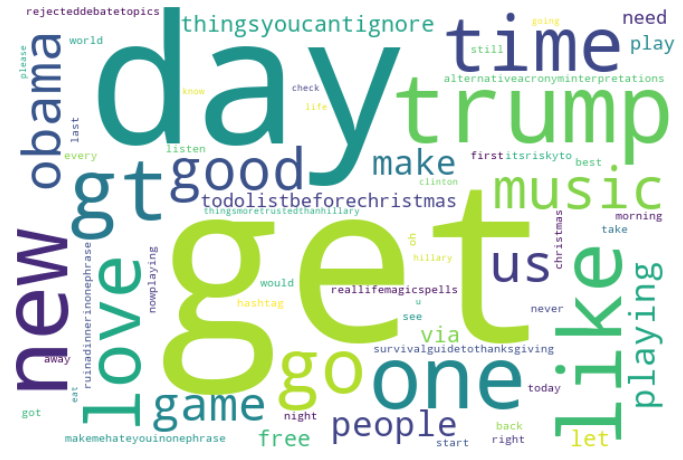

In [39]:
# General Tweets
tweets = " ".join(df[df['label'] == 'general'].clean_no_stops.values).split()

make_wordcloud(tweets, 65)
#plt.savefig('../img/wc_ge.png')

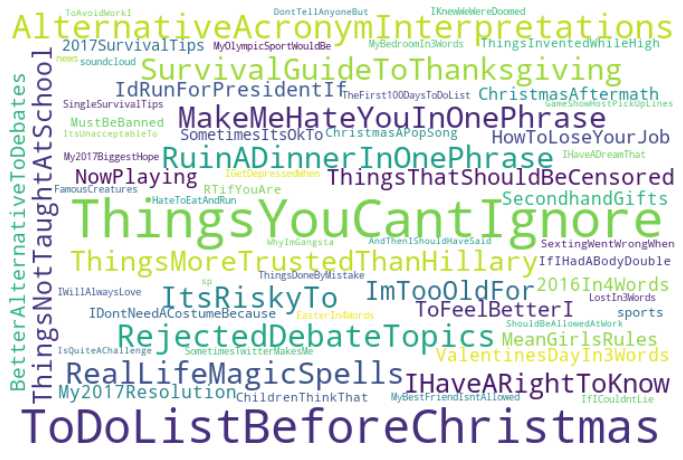

In [40]:
# Hashtags
gen = df[df['label'] == 'general']
hashtags = gen['hashtags'].apply(lambda x: " ".join(x))
make_wordcloud(hashtags, 65)

## Emojis

In [41]:
df.head()

month           handle    label  \
1   2016-10  detroitdailynew  clinton   
4   2017-08     mrclydepratt  clinton   
13  2016-08   pamela_moore13  clinton   
42  2017-03        paulinett  clinton   
43  2017-03          hyddrox  clinton   

                                                tweet  vader_score sentiment  \
1   Clinton: Trump should’ve apologized more, atta...      -0.2484  negative   
4   RT @Shareblue: Pence and his lawyers decided w...       0.0000   neutral   
13  Dave Chappelle: "Black Lives Matter" is the wo...      -0.6792  negative   
42  RT @KStreetHipster: Hamner-Brown is already on...       0.0000   neutral   
43  RT @TrumpSuperPAC: Obama's a Muslim &amp; this...       0.4184  positive   

                                         clean_tweets hashtags  \
1   clinton trump should ve apologized more attack...       []   
4   pence and his lawyers decided which of his off...       []   
13  dave chappelle black lives matter is the worst...       []   
42  hamner brown is already on its way here it s b...  [KSHBC]   
43  obama s a muslim amp this video from foxnews p...   [MAGA]   

                                       clean_no_stops  
1              clinton trump apologized attacked less  
4   pence lawyers decided official emails public c...  
13  dave chappelle black lives matter worst slogan...  
42        hamner brown already way way billions kshbc  
43  obama muslim video foxnews proves even cnn adm...

In [42]:
df['emojis'] = df['tweet'].map(get_emojis)

In [43]:
emos = ' '.join(list(df['emojis'].apply(lambda x: " ".join(x))))

In [44]:
from collections import Counter

emo_count = Counter(emos)

In [45]:
top_emos = emo_count.most_common(25)
top_emos

[(' ', 216000),
 ('😂', 2837),
 ('🇸', 1817),
 ('🇺', 1814),
 ('▶', 1146),
 ('🔥', 1096),
 ('💥', 906),
 ('🚨', 660),
 ('❤', 637),
 ('👇', 522),
 ('👍', 483),
 ('🤔', 475),
 ('👏', 434),
 ('🏾', 395),
 ('‼', 394),
 ('🏻', 392),
 ('😭', 388),
 ('🙏', 343),
 ('👉', 311),
 ('😡', 286),
 ('🏼', 281),
 ('😍', 270),
 ('🏽', 261),
 ('😊', 245),
 ('🏿', 235)]

The U and S are to make an American flag -- I'll try to combine them back together and add their counts. 

In [46]:
flag = top_emos[2] + top_emos[3]
flag

('🇸', 1817, '🇺', 1814)

In [47]:
flag_emoji = flag[2]+flag[0]
flag_count = flag[1]+flag[3]

In [48]:
usa_flag = (flag_emoji, flag_count)
usa_flag

('🇺🇸', 3631)

Success!!

In [49]:
top_emos.append(usa_flag)

In [50]:
emo_df = pd.DataFrame(top_emos, columns=['emoji', 'count'])

In [51]:
emo_df = emo_df.sort_values(by='count', ascending=False)

In [52]:
emo_df

emoji   count
0         216000
25    🇺🇸    3631
1      😂    2837
2      🇸    1817
3      🇺    1814
4      ▶    1146
5      🔥    1096
6      💥     906
7      🚨     660
8      ❤     637
9      👇     522
10     👍     483
11     🤔     475
12     👏     434
13     🏾     395
14     ‼     394
15     🏻     392
16     😭     388
17     🙏     343
18     👉     311
19     😡     286
20     🏼     281
21     😍     270
22     🏽     261
23     😊     245
24     🏿     235

In [53]:
# Remove the blanks and the U and S

idx_to_drop = [0, 2, 3] 
emo_df.drop(index=idx_to_drop, inplace=True)

In [54]:
emo_df.reset_index(inplace=True)
emo_df.drop(columns='index', inplace=True)

In [55]:
top_10_emojis = emo_df.head(10)

In [56]:
top_10_emojis

emoji  count
0    🇺🇸   3631
1     😂   2837
2     ▶   1146
3     🔥   1096
4     💥    906
5     🚨    660
6     ❤    637
7     👇    522
8     👍    483
9     🤔    475

Unfortunately you can't use emojis as in matplotlib -- or rather they Apple ones won't render. So I'll convert to text to plot them. 

In [57]:
top_10_emojis['emo_text'] = top_10_emojis['emoji'].map(emoji_as_words)
top_10_emojis['emo_text'] = top_10_emojis['emo_text'].apply(lambda x: ''.join(x))

<ipython-input-57-9d07c434046a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_emojis['emo_text'] = top_10_emojis['emoji'].map(emoji_as_words)
<ipython-input-57-9d07c434046a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_emojis['emo_text'] = top_10_emojis['emo_text'].apply(lambda x: ''.join(x))


In [58]:
top_10_emojis

emoji  count                                           emo_text
0    🇺🇸   3631  regional_indicator_symbol_letter_uregional_ind...
1     😂   2837                             face_with_tears_of_joy
2     ▶   1146                                        play_button
3     🔥   1096                                               fire
4     💥    906                                          collision
5     🚨    660                                   police_car_light
6     ❤    637                                          red_heart
7     👇    522                       backhand_index_pointing_down
8     👍    483                                          thumbs_up
9     🤔    475                                      thinking_face

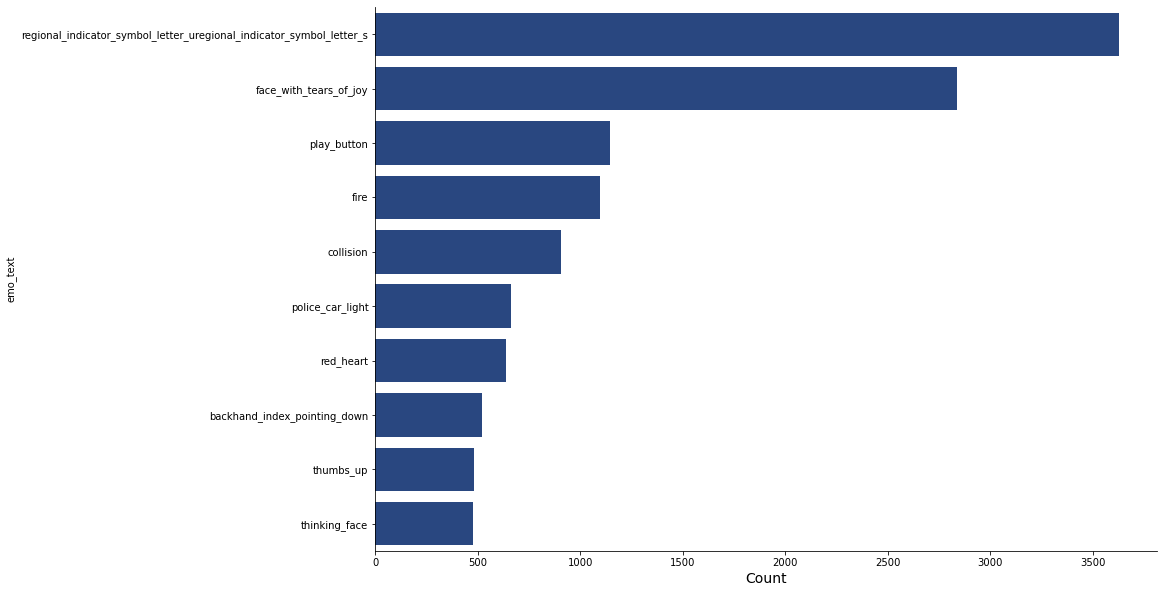

In [59]:
plt.figure(figsize=(14, 10))
sns.barplot(x="count", y="emo_text", data=top_10_emojis, color='#1a438fff')
#plt.title('Most common emojis', fontsize=16)
plt.xlabel('Count', fontsize=14)
sns.despine()